In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model,Sequential
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation



In [24]:
import pandas as pd
batchsize=8

In [25]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\Prepared_Data\train',
                                target_size=(24,24),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\Prepared_Data\train',
                                target_size=(24,24),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 64662 images belonging to 2 classes.
Found 16165 images belonging to 2 classes.


In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\Prepared_Data\test',
                                target_size=(24,24),batch_size=batchsize,class_mode='categorical')

Found 4071 images belonging to 2 classes.


In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\Prepared_Data\test',
                                target_size=(24,24),batch_size=batchsize,class_mode='categorical')

Found 4071 images belonging to 2 classes.


In [28]:
model = Sequential()
input_shape = (24, 24, 3) 

# First set of CONV => RELU => POOL layers
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second set of CONV => RELU => POOL layers
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# First (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))

# Softmax classifier
model.add(Dense(2))
model.add(Activation('softmax'))
        



        


In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau


In [30]:
checkpoint = ModelCheckpoint(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\models\model-own-lenet.h5',
                            monitor='val_loss',save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', patience=2, verbose= 1, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=0, verbose= 1,factor=0.2, )

callbacks=[checkpoint,earlystop,learning_rate]

In [31]:
# Biên dịch model mạng: mô hình tối ưu optimize: adam 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

history = model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=8)

Epoch 1/8
8078/8082 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8585
Epoch 1: val_loss improved from inf to 0.35486, saving model to D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\models\model-own-lenet.h5
8082/8082 [==============================] - 132s 16ms/step - loss: 0.3119 - accuracy: 0.8585 - val_loss: 0.3549 - val_accuracy: 0.8425 - lr: 0.0010
Epoch 2/8
8082/8082 [==============================] - ETA: 0s - loss: 0.1437 - accuracy: 0.9459
Epoch 2: val_loss improved from 0.35486 to 0.32311, saving model to D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\models\model-own-lenet.h5
8082/8082 [==============================] - 104s 13ms/step - loss: 0.1437 - accuracy: 0.9459 - val_loss: 0.3231 - val_accuracy: 0.8668 - lr: 0.0010
Epoch 3/8
8078/8082 [============================>.] - ETA: 0s - loss: 0.1182 - accuracy: 0.9570
Epoch 3: val_loss improved from 0.32311 to 0.30484, saving model to D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\mod

In [32]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy,lr
0,0.311870,0.858539,0.354855,0.842512,0.0010
1,0.143690,0.945912,0.323110,0.866770,0.0010
2,0.118184,0.957017,0.304840,0.869616,0.0010
3,0.102639,0.961735,0.400258,0.839356,0.0010
4,0.078859,0.972330,0.354745,0.855446,0.0002


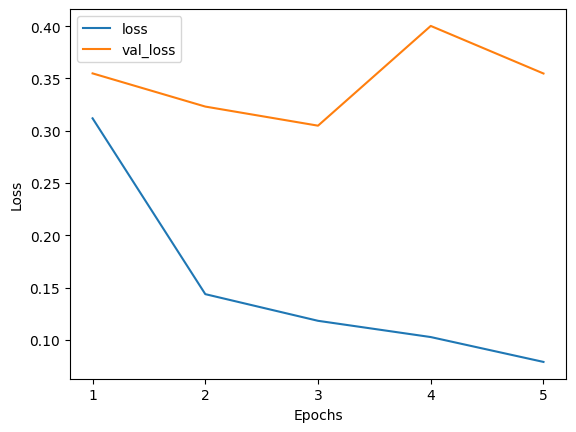

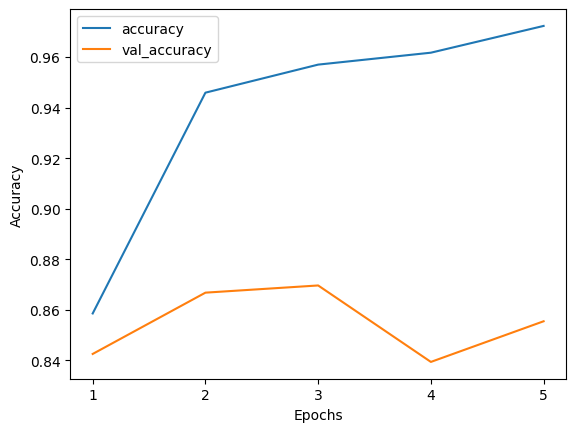

In [33]:
import matplotlib.pyplot as plt

history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(5)),list(range(1,6)))
plt.show()

history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(5)),list(range(1,6)))
plt.show()

In [34]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        896       
                                                                 
 activation_8 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 12, 12, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                  